## Question 2

## a)

In [101]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, [i]] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [102]:
import numpy as np
from scipy.io import loadmat
in_data = loadmat('BreastCancer.mat')
for key in in_data.keys():
    print(key)
X = in_data['X']
y = in_data['y']

__header__
__version__
__globals__
X
y


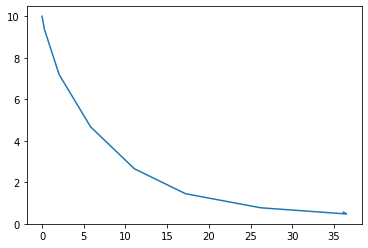

In [103]:
# using only the first 100 patients
la_num = 20
X_a = X[0:100, :]
y_a = y[0:100]
# la_array = np.array([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 20]) # spaced logarithmically
la_array = np.logspace(-6, 2, num=la_num)
W = ista_solve_hot(X_a, y_a, la_array)

w_norm = np.zeros(len(la_array))
res = np.zeros(len(la_array))
for i in range(len(la_array)):
    w = W[:, [i]]
    w_norm[i] = np.linalg.norm(w, ord=1) # 1 norm
    res[i] = np.linalg.norm(X_a @ w - y_a, ord=2)
    
plt.plot(w_norm, res)

As lamda increases, the l1 norm of w decreases, the residue error increases.
There is a point on the spectrum of lamda where increasing lamda yileds significant increase in residue error while  little change in w1 norm of w

## b)

In [104]:
def find_err_rate(X, y, w):
    err = 0
    y_head = X @ w
    for i in range(len(y)):
        if (y[i] != np.sign(y_head[i])):
            err+=1
    err_rate = err / len(y)
    return err_rate

def find_sparsity(w):
    s = 0;
    for wi in w:
        if (np.absolute(wi) > 10**-6):
            s+=1
    return s

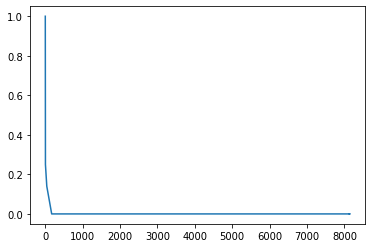

In [105]:
err_rates = np.zeros(la_num)
sparsities = np.zeros(la_num)

for i in range(la_num):
    w = W[:, [i]]
    err_rates[i] = find_err_rate(X_a, y_a, w)
    sparsities[i] = find_sparsity(w);

plt.plot(sparsities, err_rates)

Between 0 to ~100 on the sparsity scale, increasing the sparsity of w reasults in significant reduction in error rates. However, after some point around 100, increasing sparsity of w no longer reuslts in apparant changes in error rate.

## c)
## L1 norm vs residule error

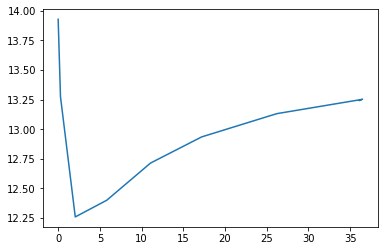

In [107]:
# using only the first 100 patients
X_b = X[101:, :]
y_b = y[101:]
# W2 = ista_solve_hot(X_b, y_b, la_array)
w_norm2 = np.zeros(len(la_array))
res2 = np.zeros(len(la_array))
for i in range(len(la_array)):
    w = W[:, [i]]
    w_norm2[i] = np.linalg.norm(w, ord=1) # 1 norm
    res2[i] = np.linalg.norm(X_b @ w - y_b, ord=2)
plt.plot(w_norm2, res2)
plt.show()

The graph now has a global minimum, an optimal point. When lamda decreases, we go to the right side of the graph, where the regularization strength is smaller and the w there is overfitting, resulting in greater residule error in the testing data. 

## sparsity vs. error rates 

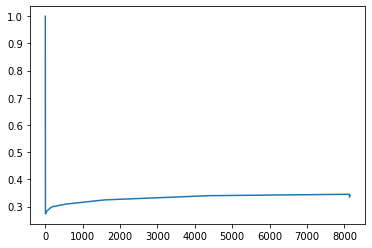

In [108]:
err_rates2 = np.zeros(la_num)
sparsities2 = np.zeros(la_num)

for i in range(la_num):
    w = W[:, [i]]
    err_rates2[i] = find_err_rate(X_b, y_b, w)
    sparsities2[i] = find_sparsity(w);

plt.plot(sparsities2, err_rates2)

The graph now has a global minimum, an optimal point. When lamda decreases, we go to the right side of the graph, where the regularization strength is smaller and the w has more non-zero entries, some of which captures unreal trend resulting in over fitting.